In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

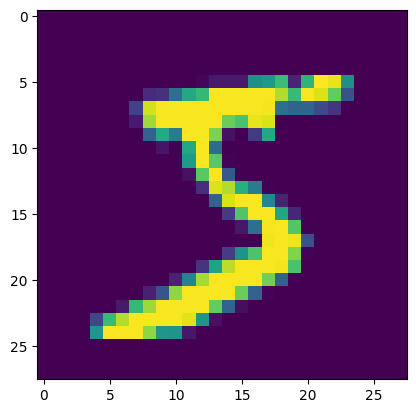

In [16]:
plt.imshow(X_train[0])

In [17]:
X_train = X_train/255
X_test = X_test/255

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [19]:
#Encoder
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

#Decoder
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=1.5),metrics=['accuracy'])

In [20]:
autoencoder.fit(X_train, X_train, epochs=5,validation_data=[X_test, X_test])

Epoch 1/5
1875/1875 [==============================] - 26s 13ms/step - loss: 0.2454 - accuracy: 0.0947 - val_loss: 0.1969 - val_accuracy: 0.1464
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1805 - accuracy: 0.1688 - val_loss: 0.1730 - val_accuracy: 0.1772
Epoch 3/5
1875/1875 [==============================] - 23s 13ms/step - loss: 0.1586 - accuracy: 0.1991 - val_loss: 0.1604 - val_accuracy: 0.1913
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1476 - accuracy: 0.2132 - val_loss: 0.1398 - val_accuracy: 0.2172
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1407 - accuracy: 0.2227 - val_loss: 0.1379 - val_accuracy: 0.2190


1/1 [==============================] - 0s 172ms/step


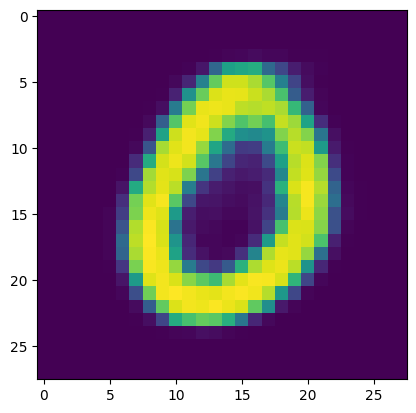

In [21]:
passed_images = autoencoder.predict(X_test[:10])
plt.imshow(passed_images[3])

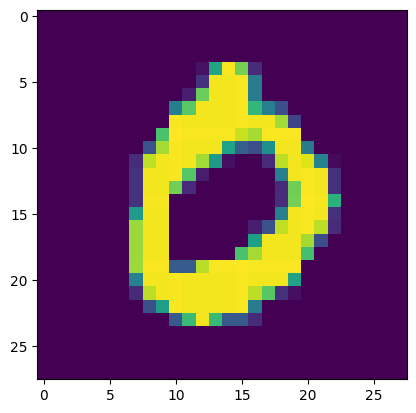

In [22]:
plt.imshow(X_test[3]) #Original image

# Denoising image

In [23]:
from tensorflow.keras.layers import GaussianNoise

In [24]:
sample = GaussianNoise(0.2)

In [25]:
noisey = sample(X_test[0:10],training=True)

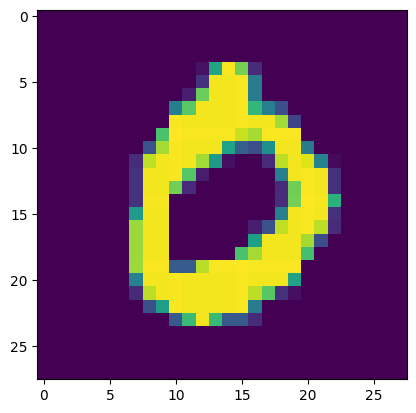

In [28]:
plt.imshow(X_test[3])

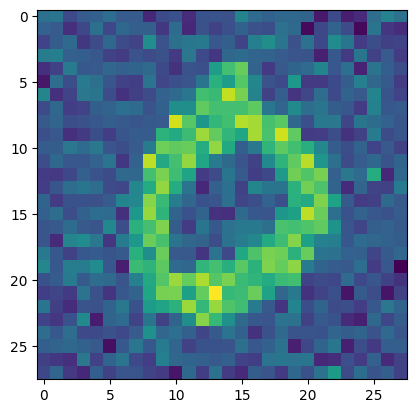

In [29]:
plt.imshow(noisey[3])

In [30]:
import tensorflow as tf
import numpy as np

In [31]:
# TO create the exact same noise as us (optional)
tf.random.set_seed(101)
np.random.seed(101)


encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
# Add noise to images before going through autoencoder
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [32]:
noise_remover = Sequential([encoder, decoder])

In [33]:
noise_remover.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])

In [34]:
noise_remover.fit(X_train, X_train, epochs=8,
                           validation_data=[X_test, X_test])

Epoch 1/8
1875/1875 [==============================] - 46s 23ms/step - loss: 0.1742 - accuracy: 0.1805 - val_loss: 0.1383 - val_accuracy: 0.2255
Epoch 2/8
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1316 - accuracy: 0.2305 - val_loss: 0.1213 - val_accuracy: 0.2392
Epoch 3/8
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1219 - accuracy: 0.2445 - val_loss: 0.1161 - val_accuracy: 0.2485
Epoch 4/8
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1176 - accuracy: 0.2512 - val_loss: 0.1126 - val_accuracy: 0.2535
Epoch 5/8
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1141 - accuracy: 0.2574 - val_loss: 0.1103 - val_accuracy: 0.2535
Epoch 6/8
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1110 - accuracy: 0.2625 - val_loss: 0.1074 - val_accuracy: 0.2633
Epoch 7/8
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1086 - accuracy: 0.2671 - val_loss: 0.1044 - val_ac

In [35]:
ten_noisey_images = sample(X_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

The Original


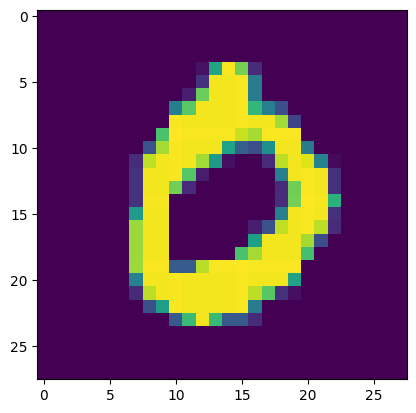

The Noisey Version


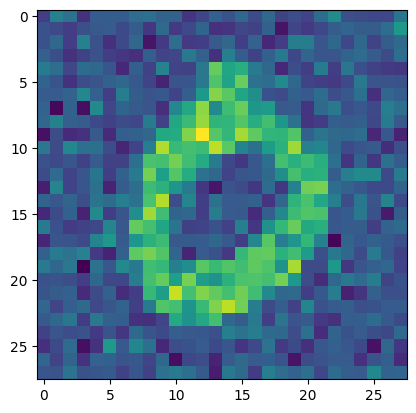

After going through denoiser


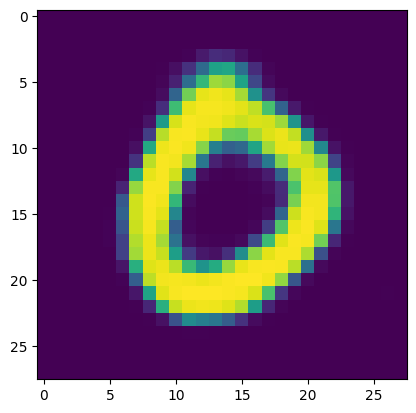

In [36]:
n = 3
print("The Original")
plt.imshow(X_test[n])
plt.show()
print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()
print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()